In [359]:
import numpy as np
import scipy as sp
from scipy.interpolate import interp1d as spline

from matplotlib import pyplot as plt

%matplotlib inline


In [360]:


# design input cells - gaussian tuning for different stimulus values
nInputs = 1000
theta = np.linspace(-.3,1.3,num=nInputs)

gaussian = lambda mu,sigma,x: np.exp(-(x-mu)**2/sigma**2)/12

mu = np.copy(theta)

eta = .1
tau = .01

## single cell model

In [361]:
# single cell model
prior = gaussian(0,.1, theta) + gaussian(1,.1,theta) 
prior/=prior.sum()

cum_prior = np.cumsum(prior)
cum_prior[0],cum_prior[-1]=0,1
f_cum_prior = spline(cum_prior,theta,kind='linear')

w = np.random.rand(nInputs)
samples =f_cum_prior(np.random.rand(10000,1))


for i,s in enumerate(samples.tolist()):
    prob_input = gaussian(mu,.2,s)
    draw = np.random.rand(nInputs)
    x = 1.*(prob_input>=draw)
#     print(x)
    y = 1*(np.dot(w,prob_input)>=1)
#     y = np.dot(w,prob_input)
#     print(y)
    dw = eta*x*y - tau*w
    w+=dw
#     print(np.linalg.norm(dw,2))
    
    
    

Text(0.5, 1.0, 'stimulus prior')

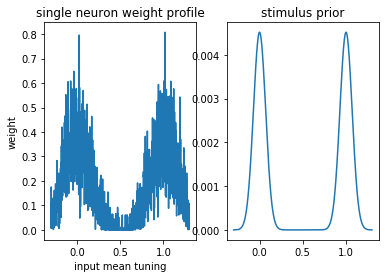

In [362]:
f,ax = plt.subplots(1,2)
ax[0].plot(mu,w)
ax[0].set_title('single neuron weight profile')
ax[0].set_xlabel('input mean tuning')
ax[0].set_ylabel('weight')

ax[1].plot(theta,prior)
ax[1].set_title('stimulus prior')

In [363]:
tst = np.array([0,1,2])
print(tst[-1::-1])

[2 1 0]


# Two Neuron Model

In [364]:
# 
# prior = gaussian(0,.1, theta) + gaussian(1,.1,theta) 
# prior/=prior.sum()
prior = 0*theta+1
cum_prior = np.cumsum(prior)
cum_prior[0],cum_prior[-1]=0,1
f_cum_prior = spline(cum_prior,theta,kind='linear')
# 
W = np.random.rand(nInputs,2)
samples =f_cum_prior(np.random.rand(10000,1))



for i,s in enumerate(samples.tolist()):
    prob_input = 2*gaussian(mu,.2,s)
    act = np.matmul(W.T,prob_input)
    Y = np.zeros(act.shape)
    Y[np.argmax(act)]=1
    
    dw = eta*prob_input[:,np.newaxis]*Y[np.newaxis,:] #- .1*W
    W+=dw
    #W/=np.linalg.norm(W,1,axis=0)[np.newaxis,:]

    

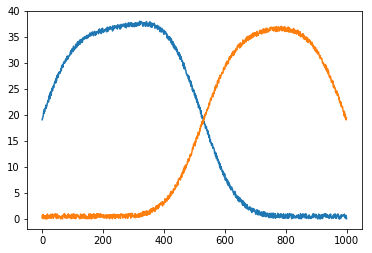

In [365]:
f,ax = plt.subplots()
ax.plot(W)

# 100 Neurons

In [384]:
# 
prior = gaussian(0,.2, theta) + gaussian(1,.2,theta) 
prior/=prior.sum()

# f1,f2 = 3.,8.
# train_m = np.array([0,.25,.5,.75,1])
# train_mm = np.log(f1*(1-train_m) + f2*train_m)
# train_mm = (train_mm-np.amin(train_mm))/(np.amax(train_mm)-np.amin(train_mm))
# # print(train_mm)
# prior = gaussian(0,.1,theta)
# for muu in train_mm:
#     prior+= gaussian(muu,.1,theta)
# prior/= prior.sum()
# prior = 0*theta+1


cum_prior = np.cumsum(prior)
cum_prior[0],cum_prior[-1]=0,1
f_cum_prior = spline(cum_prior,theta,kind='linear')

n_neurons =100
W = 1*np.random.rand(nInputs,n_neurons)
samples =f_cum_prior(np.random.rand(10000,1))
# thresh = 

for i,s in enumerate(samples.tolist()):
    prob_input =gaussian(mu,.1,s)#+ .01*np.random.rand(mu.shape[0])
    act = np.matmul(W.T,prob_input)
    Y = np.zeros(act.shape)
    
    Y[np.argsort(act)[-1:-40:-1]]=1
#     Y = np.exp(-30./n_neurons*np.argsort(act))
    dw = eta*prob_input[:,np.newaxis]*Y[np.newaxis,:] #- .001*W
    W+=dw
    W/=.01*np.linalg.norm(W,1,axis=0)[np.newaxis,:]

    

# j = 1
# for i,s in enumerate(samples.tolist()):
#     x = 1.*(2*gaussian(mu[:,np.newaxis]*np.ones([1,n_neurons]),.2,s)>=np.random.rand(nInputs,n_neurons)) # input from stimulus tuned neurons
    
#     WX = np.diag(np.matmul(W.T,x))
# #     print(np.percentile(WX,.9))
    
#     act = 1.*(WX>5)
# #     print(act.sum())
    
#     J = np.zeros(act.shape)
#     for n in range(act.shape[0]):
#         mask = np.ones(act.shape)>0
#         mask[n]=False
#         J[n]=j*act[mask].sum()
        

#     Y = 1*((WX-J)>1)
#     Y = 1*((WX-J)>1)
    
#     dW = eta*x*Y[np.newaxis,:] -tau*W# +0*np.random.rand(W.shape[0],W.shape[1])  #- 1E-5*np.linalg.norm(W,1,axis=0)[np.newaxis,:]- tau*W
#     W+=dW
        

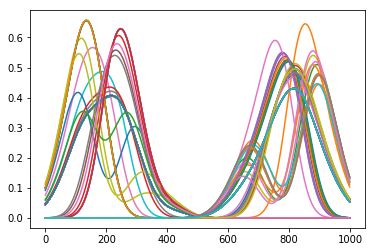

In [385]:
f,ax = plt.subplots()
trsh = ax.plot(W)

In [386]:
# sample from network
stim = np.linspace(-.3,1.3,num=1000)

YY = np.zeros([stim.shape[0],n_neurons])

for i,s in enumerate(stim.tolist()):
    prob_input =gaussian(mu,.2,s)
    act = np.matmul(W.T,prob_input)
    Y = np.zeros(act.shape)
    Y[np.argsort(act)[-1:-40:-1]]=1
#     if i ==0:
#         print(act)
    YY[i,:]=act
#     YY[i,:] = np.exp(-30./n_neurons*np.argsort(act))
    
    

In [387]:
print(YY.shape)

(1000, 100)


In [388]:
YY_ = YY/np.linalg.norm(YY+1E-5,2,axis=1)[:,np.newaxis]
S = np.matmul(YY_,YY_.T)

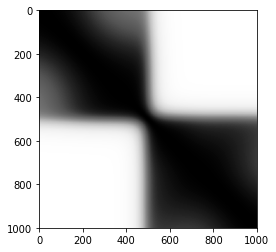

In [389]:
f,ax = plt.subplots()
ax.imshow(S,cmap='Greys')

In [193]:
f.savefig("./rare_morph_sim.png",format='png')